## **ANALISIS SENTIMEN REVIEW PENGUNJUNG DESA WISATA TIRTA AGUNG MENGGUNAKAN METODE NAIVE BAYES CLASSIFIER**

In [ ]:
!pip install Wordcloud
!pip install Sastrawi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split #Membagian data
from sklearn.metrics import accuracy_score,classification_report #Evaluasi Model
from sklearn.naive_bayes import MultinomialNB #Model
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix #Menguji Kinerja Model

In [ ]:
# Import Data Dari Google Drive
data = pd.read_excel('/content/drive/MyDrive/Data/dataset_wisata 3.xlsx')
data.head()

No                                           Komentar    Label       Wisata
0   1  Tempatnya Bagus. Dan indah. Cocok buat bersant...  Positif  Tirta Agung
1   2  Tempat yang nyaman untuk rekreasi keluarga. Ko...  Positif  Tirta Agung
2   3  Lokasi di pedesaan dengan nuansa alami, meski ...   Netral  Tirta Agung
3   4  Buat orang kota yang bosen liat gedung, ini me...   Netral  Tirta Agung
4   5                 kulinernya masih kurang pilihannya  Negatif  Tirta Agung

## 1. Data Understanding
Pada tahap ini adalah pemahaman data yang digunakan

In [ ]:
# Mengetahuli kolom dan tipe data
data.dtypes

No           int64
Komentar    object
Label       object
Wisata      object
dtype: object

In [ ]:
# Mengetahui jumlah baris data dan kolom
data.shape

(1150, 4)

In [ ]:
# Mengetahui isi data secara rinci
print(data.info())
print(data['Label'].value_counts())
print(data['Wisata'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        1150 non-null   int64 
 1   Komentar  1150 non-null   object
 2   Label     1150 non-null   object
 3   Wisata    1150 non-null   object
dtypes: int64(1), object(3)
memory usage: 36.1+ KB
None
Positif    548
Negatif    490
Netral     112
Name: Label, dtype: int64
Tirta Agung              350
Kolam Renang WOW         202
Kolam Renang Tasnan      177
Navara WaterPark         155
Kolam Renang Al-Amin     144
Kolam Renang Kharisma    122
Name: Wisata, dtype: int64


In [ ]:
# Mengetahui jika ada kolom yang kosong
# data = data.dropna() code untuk menghilangkan jika ada yang kosong
data.isnull().sum()

No          0
Komentar    0
Label       0
Wisata      0
dtype: int64

In [ ]:
# Mengecek data duplikat atau data yang sama
data.duplicated().sum()

0

## 2. Prepocessing Teks
Pada tahap ini dilakukan pembersihan data

In [ ]:
# Menampilkan 5 data teratas
data.head()

No                                           Komentar    Label       Wisata
0   1  Tempatnya Bagus. Dan indah. Cocok buat bersant...  Positif  Tirta Agung
1   2  Tempat yang nyaman untuk rekreasi keluarga. Ko...  Positif  Tirta Agung
2   3  Lokasi di pedesaan dengan nuansa alami, meski ...   Netral  Tirta Agung
3   4  Buat orang kota yang bosen liat gedung, ini me...   Netral  Tirta Agung
4   5                 kulinernya masih kurang pilihannya  Negatif  Tirta Agung

In [ ]:
# mengubah teks menjadi lower
data['Komentar'] = data['Komentar'].str.lower()
data.head()

No                                           Komentar    Label       Wisata
0   1  tempatnya bagus. dan indah. cocok buat bersant...  Positif  Tirta Agung
1   2  tempat yang nyaman untuk rekreasi keluarga. ko...  Positif  Tirta Agung
2   3  lokasi di pedesaan dengan nuansa alami, meski ...   Netral  Tirta Agung
3   4  buat orang kota yang bosen liat gedung, ini me...   Netral  Tirta Agung
4   5                 kulinernya masih kurang pilihannya  Negatif  Tirta Agung

In [ ]:
# Normalisasi untuk mengubah kata yang tidak terdeteksi kamus bahasa indonesia menjadi kata yang mudah terdeteksi dengan tujuan untuk meningkatkan performa model
norm = {" jd " : " jadi ", " gw " : " aku ", " hr " : " hari ", " brp ": " berapa ", " yg " : " yang ", " dri " : " dari "," dgn " : " dengan ", " tpi " : " tapi ", " bgus " : " bagus ", " airx " : " airnya ", " kolamx " : " kolamnya ", " tempatx " : " tempatnya ", " t4 " : " tempat ", " dech " : " deh ", " lain2 " : " lain ", " teman2 " : " teman ", " anak2 " : " anak ", " ngaco " : " sembarangan " , " kwalitas " : " kualitas ", " blom " : " belum ", " org " : " orang ", " tdk " : " tidak ", " n " : " dan ", " tp " : " tapi ", " jg " : " juga ", " bgt " : " banget ", " bgs " : " bagus ", " dlm " : " dalam ", " d " : " di ", " bnyk " : " banyak ", " hrga " : " harga ", " sm " : " sama ", " dsb " : " dan sebagainya ", " sdh " : " sudah ", " k " : " ke ", " lg " : " lagi ", " htm " : " harga tiket masuk ", " sdr " : " saudara ", " utk " : " untuk ", " tempatx " : " tempatnya ", " klrga " : " keluarga ", " liat " : " lihat " }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['Komentar'] = data['Komentar'].apply(lambda x: normalisasi(x))
data.head()

No                                           Komentar    Label       Wisata
0   1  tempatnya bagus. dan indah. cocok buat bersant...  Positif  Tirta Agung
1   2  tempat yang nyaman untuk rekreasi keluarga. ko...  Positif  Tirta Agung
2   3  lokasi di pedesaan dengan nuansa alami, meski ...   Netral  Tirta Agung
3   4  buat orang kota yang bosen lihat gedung, ini m...   Netral  Tirta Agung
4   5                 kulinernya masih kurang pilihannya  Negatif  Tirta Agung

In [ ]:
# Cleaning menggunakan Stopword untuk menghilangkan kata yang tidak terlalu penting contoh : yang, di, ke, dan lain-lain
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

def remove_punct(text):
  text = re.sub(r'[-()\"#/@;!:<>{}=~|.?]',' ',text)
  text = re.sub(r'\b\w(1,2)\b', '',text)
  text = re.sub(r'\s\s+',' ', text)
  return text

data['Komentar'] = data['Komentar'].apply(lambda x: stopwords(x))
data.head()

No                                           Komentar    Label       Wisata
0   1  tempatnya bagus. indah. cocok buat bersantai m...  Positif  Tirta Agung
1   2  tempat nyaman rekreasi keluarga. kolam renang ...  Positif  Tirta Agung
2   3  lokasi pedesaan nuansa alami, meski akses jala...   Netral  Tirta Agung
3   4  buat orang kota bosen lihat gedung, menarik si...   Netral  Tirta Agung
4   5                       kulinernya kurang pilihannya  Negatif  Tirta Agung

In [ ]:
# Tokenisasi untuk memisahkan semua kalimat pada data
tokenized = data['Komentar'].apply(lambda x:x.split())
tokenized

0       [tempatnya, bagus., indah., cocok, buat, bersa...
1       [tempat, nyaman, rekreasi, keluarga., kolam, r...
2       [lokasi, pedesaan, nuansa, alami,, meski, akse...
3       [buat, orang, kota, bosen, lihat, gedung,, men...
4                        [kulinernya, kurang, pilihannya]
                              ...                        
1145    [tempat, parkir, cukup, terbatas, sekitar, tem...
1146    [tempat, memiliki, beragam, kegiatan, cocok, s...
1147    [terkesan, keramahan, penduduk, lokal, memberi...
1148    [pemandangan, sekitar, tempat, sangatlah, mena...
1149    [banyak, spot, foto, instagramable, sekitar, t...
Name: Komentar, Length: 1150, dtype: object

In [ ]:
# Stemming untuk mengubah menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Komentar):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Komentar:
    dt = stemmer.stem(w)
    if dt == "awat":
      dt = "rawat"
    do.append(dt)
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Data/dataset_wisata 3.csv', index=False)
data_clean = pd.read_csv('/content/drive/MyDrive/Data/dataset_wisata 3.csv', encoding='latin1')

tempat bagus indah cocok buat santa cari tenang tempat asri satu alam
tempat nyaman rekreasi keluarga kolam renang langsung mata air sangat jernih
lokasi desa nuansa alami meski akses jalan kurang baik fasilitas cukup lengkap
buat orang kota bosen lihat gedung tarik sih hawa dingin banget tidak saran buat dateng sore pas musim hujan
kuliner kurang pilih
tempat wisata buat keluarga ken suasana alam harga jangkau di tirta agung aja gaes tempat asyik banget loh kolam renang anak gazebo kantin cafe buka khusus sore-malam spot foto2nya sangat indah harga tiket masuk makan minum sangat murah banget  rasa makan minum te ou pe 
tempat nyaman healing sama keluarga
destinasi wisata sudut kota tape bondowoso tepat desa sukosari jalur arah mau daki gunung raung jalur lama air kolam renang langsung sumber mata air gunung raung jamin gak pedih mata tambah bonus pandang alam sawah desa jadi bikin libur kamu makin asyik htm 5k parkir motor 2k parkir mobil 5k
halo semua sini akan jelas detail  desa wis

In [ ]:
data.isnull().sum()

No          0
Komentar    0
Label       0
Wisata      0
dtype: int64

In [ ]:
# Menggabungkan Data
at1 = pd.read_csv('/content/drive/MyDrive/Data/dataset_wisata 3.csv') # Data yang sudah bersih
at2 = pd.read_excel('/content/drive/MyDrive/Data/dataset_wisata 3.xlsx') # Data lama untuk dipanggil kolom Labelnya
att2 = at2['Label']

data_clean = pd.concat([at1, att2], axis=1)
data_clean.head()

Komentar    Label
0  tempat bagus indah cocok buat santa cari tenan...  Positif
1  tempat nyaman rekreasi keluarga kolam renang l...  Positif
2  lokasi desa nuansa alami meski akses jalan kur...   Netral
3  buat orang kota bosen lihat gedung tarik sih h...   Netral
4                               kuliner kurang pilih  Negatif

In [ ]:
# Pemberian bobot pada data
data_clean = data_clean.replace({'Positif' :1, 'Negatif' :0, 'Netral' :2})
data_clean.head()

Komentar  Label
0  tempat bagus indah cocok buat santa cari tenan...      1
1  tempat nyaman rekreasi keluarga kolam renang l...      1
2  lokasi desa nuansa alami meski akses jalan kur...      2
3  buat orang kota bosen lihat gedung tarik sih h...      2
4                               kuliner kurang pilih      0

## 3. Visualisasi Data
Pada tahap ini dilakukan visualisasi Data yang digunakan

In [ ]:
data_negatif = data_clean[data_clean['Label'] == 0]
data_positif = data_clean[data_clean['Label'] == 1]
data_netral = data_clean[data_clean['Label'] == 2]

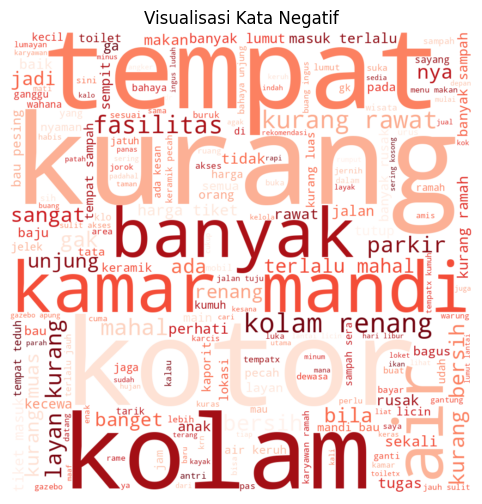

In [ ]:
# Untuk visualisasi kata negatif
all_text_L0 = ' '.join(word for word in data_negatif["Komentar"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color="white").generate(all_text_L0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

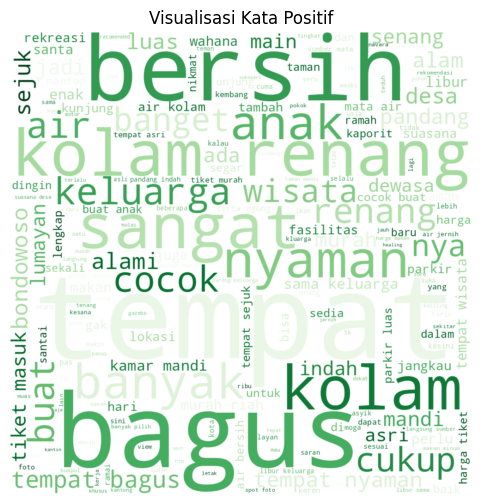

In [ ]:
# Untuk Visualisasi kata Positif
all_text_L1 = ' '.join(word for word in data_positif["Komentar"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color="white").generate(all_text_L1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

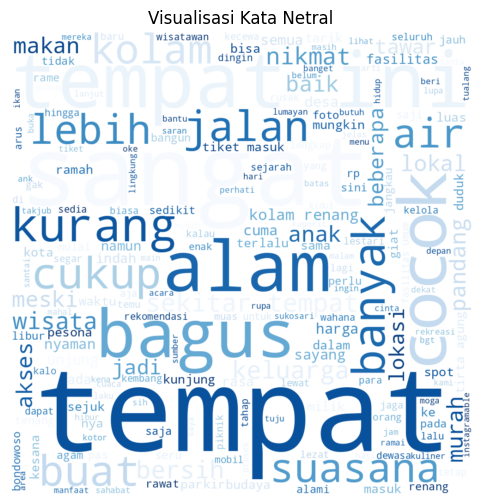

In [ ]:
# Untuk Visualisasi kata Netral
all_text_L2 = ' '.join(word for word in data_netral["Komentar"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color="white").generate(all_text_L2)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# Menampilkan jumlah data positif dan negatif
data_clean['Label'].value_counts()

1    548
0    490
2    112
Name: Label, dtype: int64

In [ ]:
data_clean.head()

Komentar  Label
0  tempat bagus indah cocok buat santa cari tenan...      1
1  tempat nyaman rekreasi keluarga kolam renang l...      1
2  lokasi desa nuansa alami meski akses jalan kur...      2
3  buat orang kota bosen lihat gedung tarik sih h...      2
4                               kuliner kurang pilih      0

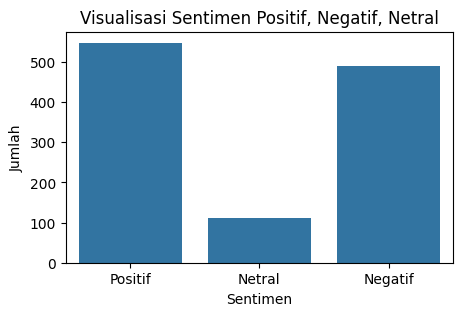

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Label')
plt.title('Visualisasi Sentimen Positif, Negatif, Netral')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

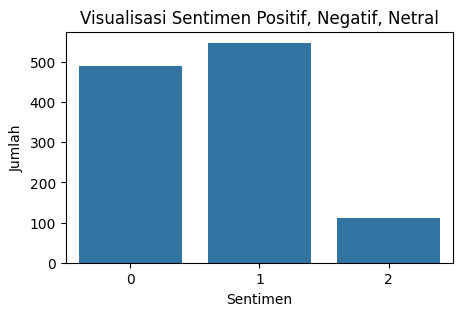

In [ ]:
# Visualisasi sentimen positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=data_clean, x='Label')
plt.title('Visualisasi Sentimen Positif, Negatif, Netral')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Memisahkan data menjadi data latih dan data uji
x = data_clean['Komentar']
y = data_clean['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=123) # Disini data dipisah menjadi 15% data testing dan 80 % untuk data training

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  977
x_test =  173
y_train =  977
y_test =  173


In [ ]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
# Melakukan oversampling menggunakan SMOTE pada data latih
smote = SMOTE(random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_vec, y_train)

In [ ]:
# Mengubah data menjadi seimbang
#sentimen_counts = y_train_resampled.value_counts()

#plt.figure(figsize=(5, 3))
#plt.bar(sentimen_counts.index, sentimen_counts.values)
#plt.xlabel('Sentimen')
#plt.ylabel('Jumlah')
#plt.title('Visualisasi Sentimen Menggunakan SMOTE')
#plt.xticks(sentimen_counts.index, ['Negatif', 'Positif', 'Netral'])
#plt.show()

## 5. Modeling

In [ ]:
# Inisialisasi model naive bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
# Menampilkan hasil prediksi nilai y dari x_test
y_pred = naive_bayes.predict(x_test_vec)
#y_pred

In [ ]:
# Menampilkan hasil prediksi probabilitas
#naive_bayes.predict_proba(x_test_vec)

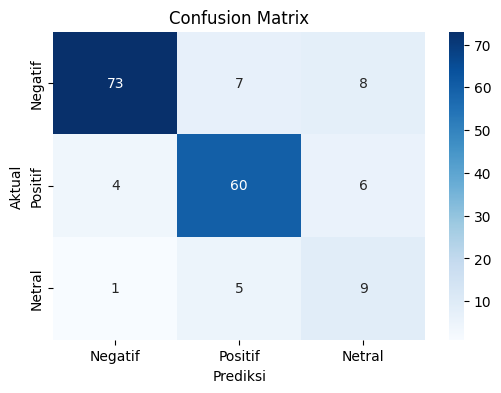

In [ ]:
# Menguji Kinerja Model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Netral'], yticklabels=['Negatif', 'Positif', 'Netral'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Positif', 'Netral'])

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print accuracy and classification report
print('Akurasi Model Naive Bayes :', '{:.2f}%'.format(accuracy * 100))
print('Rata-Rata Precision :', '{:.2f}%'.format(precision * 100))
print('Rata-Rata Recall :', '{:.2f}%'.format(recall * 100))
print('Rata-Rata F1-Score :', '{:.2f}%'.format(f1 * 100))
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes : 82.08%
Rata-Rata Precision : 84.72%
Rata-Rata Recall : 82.08%
Rata-Rata F1-Score : 83.04%

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.94      0.83      0.88        88
     Positif       0.83      0.86      0.85        70
      Netral       0.39      0.60      0.47        15

    accuracy                           0.82       173
   macro avg       0.72      0.76      0.73       173
weighted avg       0.85      0.82      0.83       173



In [ ]:
 new_text = input("\nMasukkan teks baru: ")  # Mengambil input teks baru dari pengguna
new_text_vec = vectorizer.transform([new_text])  # Mengubah teks menjadi vektor fitur menggunakan objek vectorizer yang telah dibuat sebelumnya
predicted_sentimen = naive_bayes.predict(new_text_vec)  # Memprediksi sentimen teks menggunakan model naive bayes yang telah dilatih

# Mengubah hasil prediksi menjadi label sentimen yang sesuai
if predicted_sentimen[0] == 1:
    sentiment_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentiment_label = "Negatif"
else:  # Jika nilai prediksi bukan 1 atau 0, diasumsikan sebagai Netral
    sentiment_label = "Netral"

print("Hasil Analisis Sentimen untuk Teks Baru :", sentiment_label)  # Mencetak hasil analisis sentimen



Masukkan teks baru: tempat jelek
Hasil Analisis Sentimen untuk Teks Baru : Negatif
